Trying adni with `BebmS`.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import json 
import tqdm 
from bebms import cross_validatation, run_bebms
from collections import defaultdict, Counter

/home/hhao9/miniconda/envs/jobs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams.update({
    "axes.titlesize": 13,
    "axes.labelsize": 13,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "figure.titlesize": 13
})

In [3]:
data_file = '../adni.csv'

- seed 53: 524.5
- seed 4790: 537.1
- seed 9740: 527
- seed 527: 542 (it seems to be improve still; try 30k)

```py
defaultdict(float,
            {3909728387: 548.799729773664,
             362137198: 523.3271770817154,
             2879610203: 538.1779918911058,
             3119595003: 499.1338975909813,
             609065470: 486.7738239313608,
             687258155: 539.4592299765827,
             1377814347: 544.6213095151361,
             910799812: 550.4503253458796, # best one!
             151927753: 540.6273391389005,
             1385168577: 535.6470424738126})
```

```py
defaultdict(float,
            {2790562116: 540.7105389847512,
             3662307760: 550.8186628508242,
             557433496: 538.8022279693803,
             1206302003: 539.5759309462637,
             404553473: 554.3200453406863, # best one!
             2666898808: 527.6906502741894,
             564847624: 528.2075654874379,
             4202287173: 545.193038748657,
             1696858945: 537.6840082190624,
             3348913984: 479.65074131228585})
```

with z score norm:

```py
defaultdict(float,
            {1415063724: -10267.865752526013,
             1057138658: -10253.374531342562, # largest one!
             4126042357: -10330.775347823335,
             1283497782: -10300.777509150417,
             2190606311: -10327.671229426955,
             3485406663: -10316.623264685117,
             789120790: -10286.396801121906,
             405120712: -10286.38906171374,
             2301125044: -10280.553690989427,
             3338156122: -10286.294609725048})
```       

4 subtypes:

```py
defaultdict(float,
            {2455675121: 558.5318690777407, # best!
             2996334973: 551.8299000415287,
             3202546954: 555.6514682746925,
             270247924: 555.9132475591969,
             2257232142: 552.8185349843864,
             1373769058: 557.1489198155424,
             2499804756: 553.5502564608618,
             1988893661: 546.2348594942824,
             2182697126: 534.8560374348456,
             3844481157: 547.0467002555306})
```

In [4]:
seed = 404553473
# seed = 910799812
# seed = 1057138658
# seed = 2455675121

In [5]:
results, all_orders, all_loglikes, best_order_matrix, biomarker_names, ml_stage, ml_subtype = run_bebms(
        data_file= data_file,
        n_subtypes=3,
        output_dir='adni_my',
        n_iter=20000,
        n_shuffle=2,
        n_subtype_shuffle=2,
        burn_in=200,
        thinning=1,
        seed = seed,
        obtain_results=True,
        save_results=True,
        with_labels=True,
        save_plots=True,
        # z_score_norm=True,
    )

2025-11-09 00:05:35,882 [INFO] Running adni
2025-11-09 00:05:35,886 [INFO] Number of biomarkers: 12
2025-11-09 00:06:04,436 [INFO] Iteration 2000/20000, Acceptance Ratio: 2.55%, Log Likelihood: 523.8169, 
2025-11-09 00:06:22,467 [INFO] Iteration 4000/20000, Acceptance Ratio: 1.75%, Log Likelihood: 545.2922, 
2025-11-09 00:06:40,527 [INFO] Iteration 6000/20000, Acceptance Ratio: 1.23%, Log Likelihood: 548.0058, 
2025-11-09 00:06:58,543 [INFO] Iteration 8000/20000, Acceptance Ratio: 0.95%, Log Likelihood: 547.7500, 
2025-11-09 00:07:16,551 [INFO] Iteration 10000/20000, Acceptance Ratio: 0.76%, Log Likelihood: 547.7500, 
2025-11-09 00:07:34,551 [INFO] Iteration 12000/20000, Acceptance Ratio: 0.65%, Log Likelihood: 554.3200, 
2025-11-09 00:07:52,571 [INFO] Iteration 14000/20000, Acceptance Ratio: 0.57%, Log Likelihood: 553.0243, 
2025-11-09 00:08:10,606 [INFO] Iteration 16000/20000, Acceptance Ratio: 0.52%, Log Likelihood: 551.6074, 
2025-11-09 00:08:28,598 [INFO] Iteration 18000/20000, Ac

In [6]:
# # count subtypes
# counts = Counter(results['ml_subtype'])
# total = sum(counts.values())

# # convert to DataFrame
# df_counts = pd.DataFrame(
#     [(k, v, v/total) for k, v in counts.items()],
#     columns=["subtype", "count", "proportion"]
# ).sort_values(by=['subtype'])

# print(df_counts)

In [7]:
# dic = defaultdict(float)
# for _ in range(10):
#     x = np.random.randint(1, 2**32 - 1)
#     results, _,_,_,_,_,_ = run_bebms(
#         data_file= data_file,
#         n_subtypes=4,
#         output_dir='adni_my',
#         n_iter=20000,
#         n_shuffle=2,
#         n_subtype_shuffle=2,
#         burn_in=200,
#         thinning=1,
#         seed = x,
#         obtain_results=True,
#         save_results=False,
#         with_labels=True,
#         save_plots=False,
#         z_score_norm=False,
#     )
#     dic[x] = results['max_log_likelihood']

In [8]:
# dic

In [9]:
import numpy as np

def compute_stage_probabilities(all_orders, burn_in, thinning):
    """
    Compute biomarker stage probabilities for each subtype.

    Args:
        all_orders: np.ndarray of shape (n_iter, n_subtypes, n_biomarkers),
                    where each entry is the stage (rank) of a biomarker.
        burn_in: int, burn-in samples to discard.
        thinning: int, thinning interval.

    Returns:
        probs_per_subtype: list of arrays, each (n_biomarkers, n_stages)
    """
    # Apply burn-in + thinning to samples
    filtered = all_orders[burn_in::thinning]   # shape: (n_samples, n_subtypes, n_biomarkers)
    n_samples, n_subtypes, n_biomarkers = filtered.shape
    n_stages = n_biomarkers

    probs_per_subtype = []
    for s in range(n_subtypes):
        probs = np.zeros((n_biomarkers, n_stages))
        bm_histories = filtered[:, s, :]  # (n_samples, n_biomarkers)
        for bm_idx in range(n_biomarkers):
            for stage in range(1, n_stages + 1):
                probs[bm_idx, stage-1] = np.sum(bm_histories[:, bm_idx] == stage) / n_samples
        probs_per_subtype.append(probs)
    return probs_per_subtype


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def show_subebm_heatmaps_grid(
    all_orders,
    burn_in,
    thinning,
    biomarker_names,
    best_orders=None,   # list of arrays, one per subtype
    subtype_ns=None,    # list of participant counts
    cmap="Blues"
):
    """
    Show a grid of subtype heatmaps for SubEBM results.

    Args:
        all_orders: np.ndarray, shape (n_iter, n_subtypes, n_biomarkers)
        burn_in, thinning: MCMC params
        biomarker_names: list of biomarker names
        best_orders: optional list of best orders (arrays of stage indices)
        subtype_ns: optional list of counts for each subtype
        cmap: colormap
    """
    probs_per_subtype = compute_stage_probabilities(all_orders, burn_in, thinning)
    n_subtypes = len(probs_per_subtype)
    n_biomarkers, n_stages = probs_per_subtype[0].shape

    ncols = min(3, n_subtypes)
    nrows = math.ceil(n_subtypes / ncols)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(ncols * 5, nrows * 5),
        constrained_layout=True
    )
    if nrows == 1: axes = np.array([axes])

    for idx, probs in enumerate(probs_per_subtype):
        row, col = divmod(idx, ncols)
        ax = axes[row, col]

        # reorder biomarkers if best_order provided
        if best_orders is not None:
            order = np.argsort(best_orders[idx])
            probs = probs[order]
            ylabels = [f"{biomarker_names[i]} ({best_orders[idx][i]+1})" for i in order]
        else:
            ylabels = biomarker_names

        sns.heatmap(
            probs, cmap=cmap, vmin=0, vmax=1,
            xticklabels=np.arange(1, n_stages+1),
            yticklabels=ylabels, ax=ax,
            cbar=(idx == n_subtypes-1)  # only last shows colorbar
        )

        n_text = f", n={subtype_ns[idx]}" if subtype_ns is not None else ""
        ax.set_title(f"Subtype {idx + 1}{n_text}")
        ax.set_xlabel("Stage Position")
        if col == 0:
            ax.set_ylabel("Biomarker")
        else:
            ax.set_ylabel("")

    # hide unused panels
    for j in range(n_subtypes, nrows*ncols):
        row, col = divmod(j, ncols)
        axes[row, col].axis("off")
    
    plt.savefig(f"adni_my/all_ordering_bebms.pdf", bbox_inches="tight", dpi=300)
    plt.savefig(f"adni_my/all_ordering.png", bbox_inches="tight", dpi=300)

    plt.show()


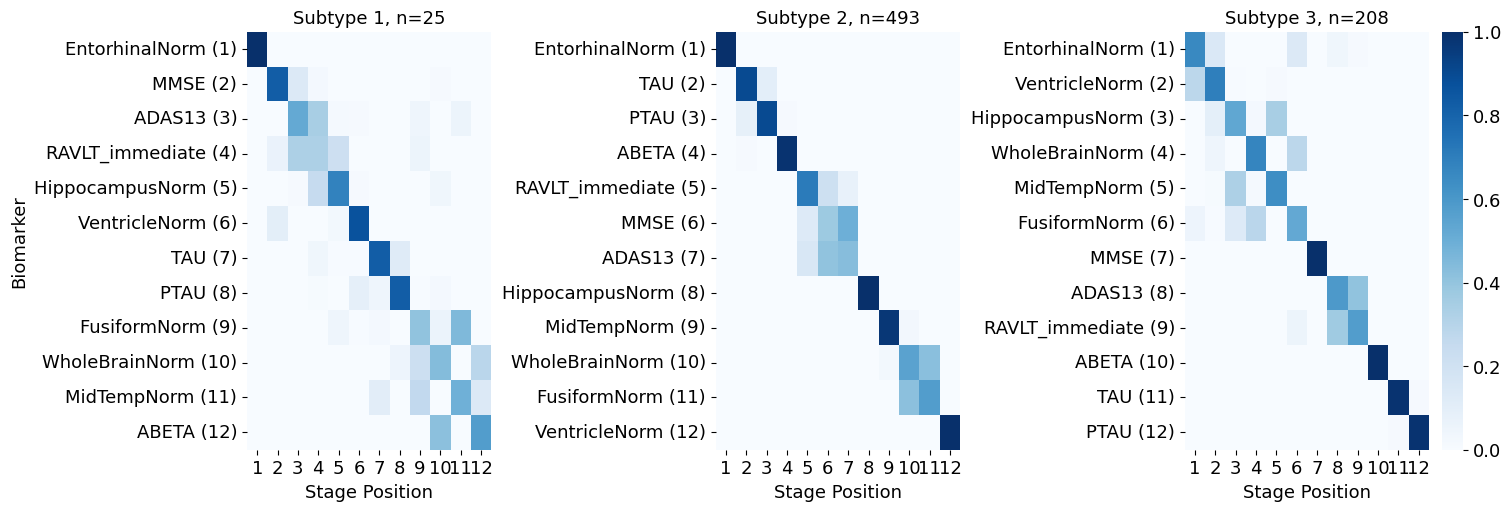

In [11]:
show_subebm_heatmaps_grid(
    all_orders=all_orders,
    burn_in=results['burn_in'],
    thinning=results['thinning'],
    biomarker_names=biomarker_names,
    best_orders=best_order_matrix,
    subtype_ns=np.bincount(results['ml_subtype'])  # optional
)

In [12]:
dx_array = np.load("../dx_array.npy", allow_pickle=True)
df = pd.DataFrame({
    "Subtype": ml_subtype,
    "Stage": ml_stage,
    "DX": dx_array
})

In [13]:
# Make subtype 1-based
df["Subtype"] = df["Subtype"] + 1

# Fractions per subtype
composition = pd.crosstab(df["Subtype"], df["DX"], normalize="index").round(2)
print(composition)


DX         AD    CN  EMCI  LMCI
Subtype                        
1        0.28  0.04  0.28  0.40
2        0.17  0.26  0.30  0.28
3        0.30  0.13  0.13  0.43


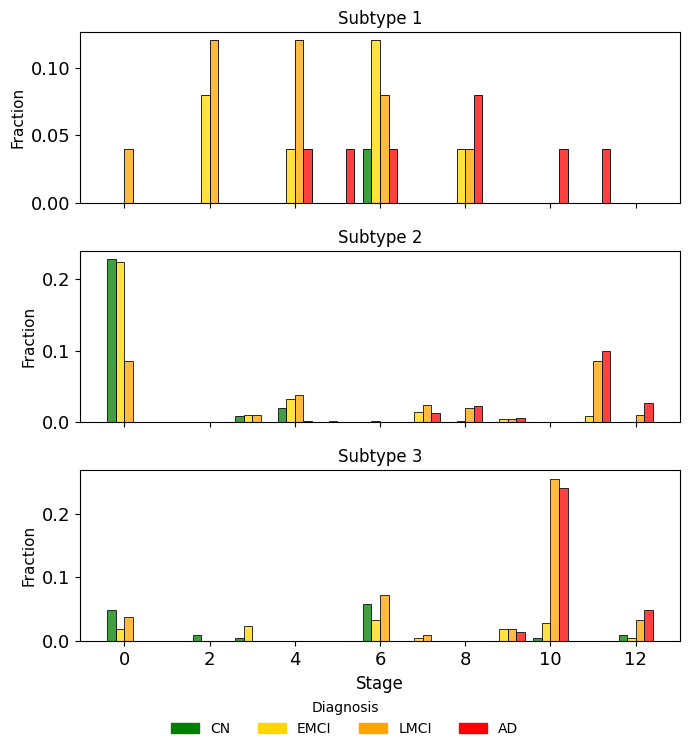

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Example DataFrame (replace with your actual arrays)
df = pd.DataFrame({
    "Subtype": ml_subtype,
    "Stage": ml_stage,
    "DX": dx_array
})

dx_order = ["CN", "EMCI", "LMCI", "AD"]
palette = {
    "CN": "green",
    "EMCI": "gold",
    "LMCI": "orange",
    "AD": "red"
}

n_subtypes = df["Subtype"].nunique()
fig, axes = plt.subplots(n_subtypes, 1, figsize=(7, 2.5*n_subtypes), sharex=True)

if n_subtypes == 1:
    axes = [axes]

for subtype, ax in zip(sorted(df["Subtype"].unique()), axes):
    sub_df = df[df["Subtype"] == subtype]

    sns.histplot(
        data=sub_df,
        x="Stage",
        hue="DX",
        hue_order=dx_order,
        stat="probability",
        multiple="dodge",
        discrete=True,
        shrink=0.8,
        palette=palette,
        ax=ax
    )
    
    ax.set_title(f"Subtype {subtype+1}", fontsize=12)
    ax.set_ylabel("Fraction", fontsize=11)
    ax.legend_.remove()

axes[-1].set_xlabel("Stage", fontsize=12)

# Build one clean legend manually
legend_handles = [Patch(color=palette[dx], label=dx) for dx in dx_order]
fig.legend(
    handles=legend_handles,
    title="Diagnosis",
    loc="lower center",
    ncol=4,
    frameon=False,
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"adni_my/all_staging_bebms.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"adni_my/all_staging.png", bbox_inches="tight", dpi=300)
